In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

%matplotlib inline

In [3]:
df = pd.read_csv('amz.csv')

In [41]:
pd.set_option('display.max_rows', 100)

In [4]:
df

,uid,asin,title,stars,reviews,price,isBestSeller,boughtInLastMonth,category
0,1,B09B96TG33,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
1,2,B01HTH3C8S,"Anker Soundcore mini, Super-Portable Bluetooth...",4.7,98099,23.99,True,0,Hi-Fi Speakers
2,3,B09B8YWXDF,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
3,4,B09B8T5VGV,"Echo Dot with clock (5th generation, 2022 rele...",4.7,7205,31.99,False,0,Hi-Fi Speakers
4,5,B09WX6QD65,Introducing Echo Pop | Full sound compact Wi-F...,4.6,1881,17.99,False,0,Hi-Fi Speakers
...,...,...,...,...,...,...,...,...,...
2443646,2828589,B0CHSD7P2Q,"Motorbike Armour, Motorbike Clothing, Cycling ...",0.0,0,22.34,False,0,Motorbike Clothing
2443647,2828590,B0B7B8FNBQ,PROFIRST Waterproof Motorcycle 2 Piece Ladies ...,0.0,0,97.99,False,0,Motorbike Clothing
2443648,2828591,B0BD5FL5FB,Men’s Motorcycle Motorbike Biker Trousers Kevl...,0.0,0,52.99,False,0,Motorbike Clothing
2443649,2828592,B008OYLL4I,Texpeed Mens Motorcycle Motorbike Biker Trouse...,4.3,404,79.99,False,0,Motorbike Clothing


- Frequency table para 'category'.

In [5]:
frequency_table = df['category'].value_counts()

In [38]:
frequency_table

category
Sports & Outdoors                         836265
Beauty                                     19312
Handmade Clothing, Shoes & Accessories     19229
Bath & Body                                19092
Birthday Gifts                             18978
                                           ...  
Alexa Built-In Devices                       107
Motorbike Chassis                            107
Plugs                                        107
Smart Home Security & Lighting               104
Smart Speakers                                54
Name: count, Length: 296, dtype: int64

In [42]:
pd.DataFrame(frequency_table)

,count
category,
Sports & Outdoors,836265
Beauty,19312
"Handmade Clothing, Shoes & Accessories",19229
Bath & Body,19092
Birthday Gifts,18978
...,...
Alexa Built-In Devices,107
Motorbike Chassis,107
Plugs,107


- Calcular los 5 más frecuentes.

In [7]:
top_5_frequencies = frequency_table.head(5)

In [8]:
top_5_frequencies

category
Sports & Outdoors                         836265
Beauty                                     19312
Handmade Clothing, Shoes & Accessories     19229
Bath & Body                                19092
Birthday Gifts                             18978
Name: count, dtype: int64

- Visualización de la distribución de los productos por categorias utilizando bar chart.

In [43]:
top_10_frequencies = frequency_table.head(10)

C:\Users\usr\AppData\Local\Temp\ipykernel_10740\2754303242.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_10_frequencies.index, y=top_10_frequencies.values, palette="Set3");


Text(0.5, 1.0, 'Top 10 Most Frequent Categories')

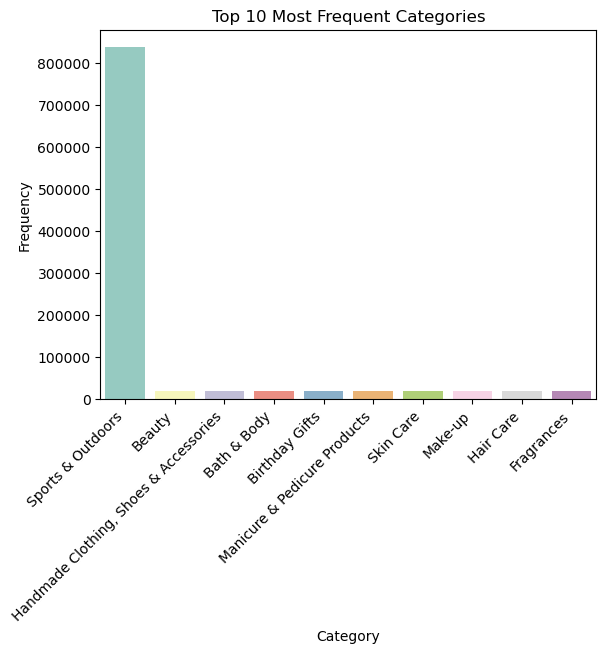

In [10]:
sns.barplot(x=top_10_frequencies.index, y=top_10_frequencies.values, palette="Set3");
# Etiquetas para que se vea más claro
plt.xticks(rotation=45, ha="right")
plt.xlabel("Category")
plt.ylabel("Frequency")
plt.title("Top 10 Most Frequent Categories")

- Usando pie chart.

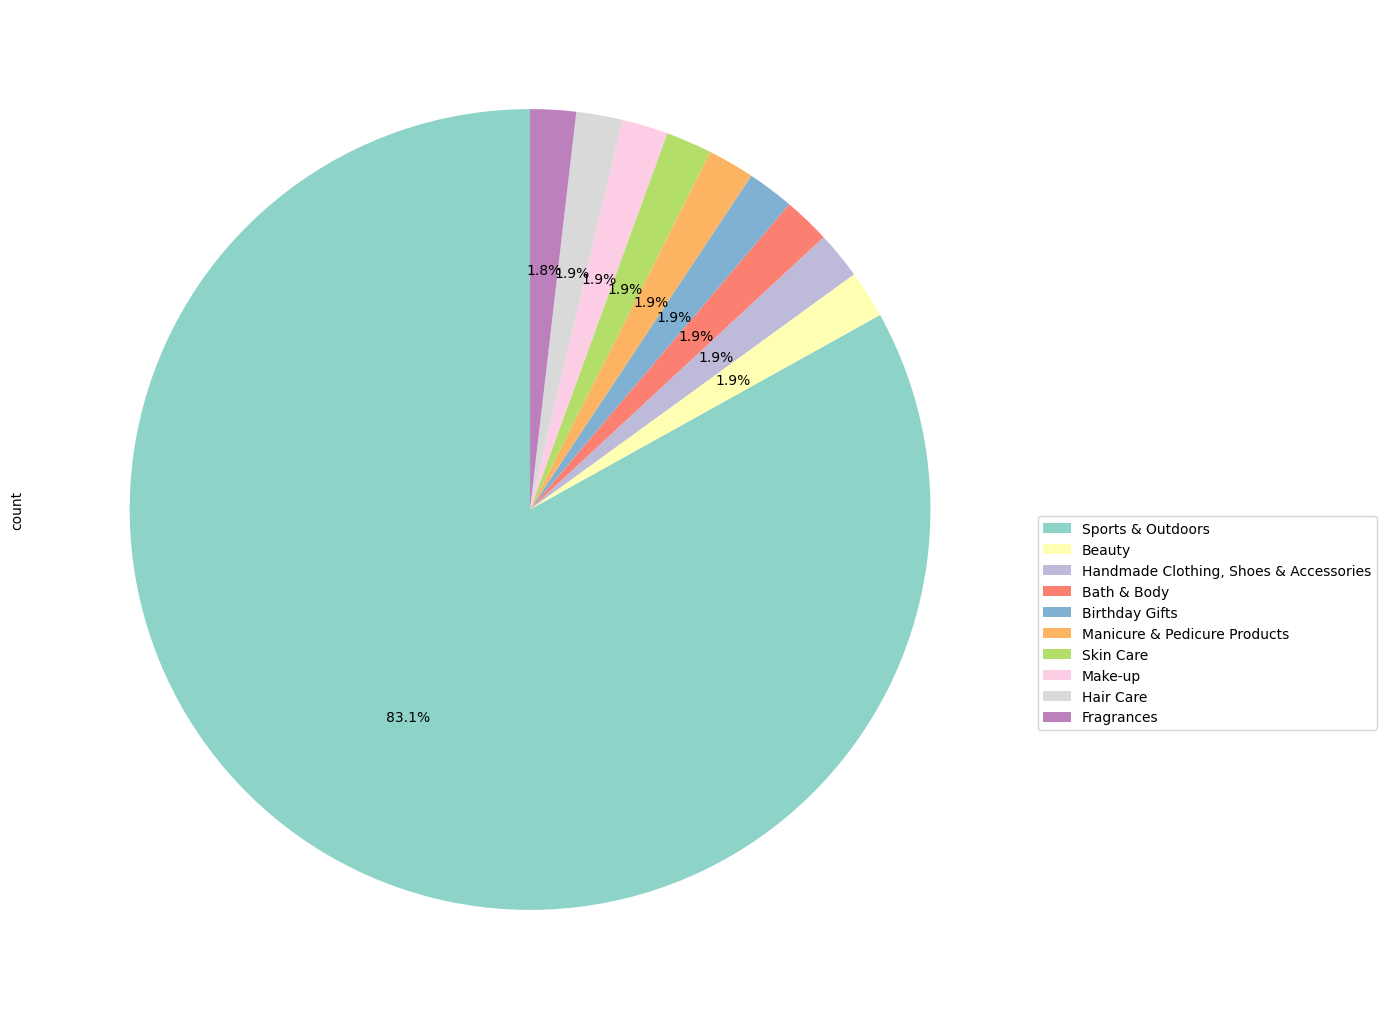

In [11]:
plt.figure(figsize=(13, 13)) # Modifico el tamaño para ver los % correctamente.
top_10_frequencies.plot.pie(autopct='%1.1f%%', startangle=90, colors=sns.color_palette("Set3"), labels=None) # Quito los nombres del gráfico que no se ven correctamente.
plt.legend(labels=top_10_frequencies.index, loc='best', bbox_to_anchor=(1, 0.5)) # Añado leyenda.

- Mean, median y mode para el 'price' de los productos.

In [12]:
mean_price = df['price'].mean()
median_price = df['price'].median()
mode_price = df['price'].mode()[0] # Nos devuelve una lista de 1 elemento, cojo el primero.

mean_price, median_price, mode_price

(89.24380943923663, 19.09, 9.99)

 - Variance, standard deviation, range e interquartile range para 'price'.

In [15]:
variance_price = df['price'].var()
std_dev_price = df['price'].std()
min_price = df['price'].min()
max_price = df['price'].max()
range_price = max_price - min_price
quantiles_price = df['price'].quantile([0.25, 0.5, 0.75])

variance_price, std_dev_price, range_price, quantiles_price

(119445.48532256528,
 345.60886175352226,
 100000.0,
 0.25     9.99
 0.50    19.09
 0.75    45.99
 Name: price, dtype: float64)

- Histograma de la distribución de precios.

- Muchos outliers que hace que los valores más comunes queden agrupados en una pequeña parte del gráfico.

<Axes: xlabel='price', ylabel='Count'>

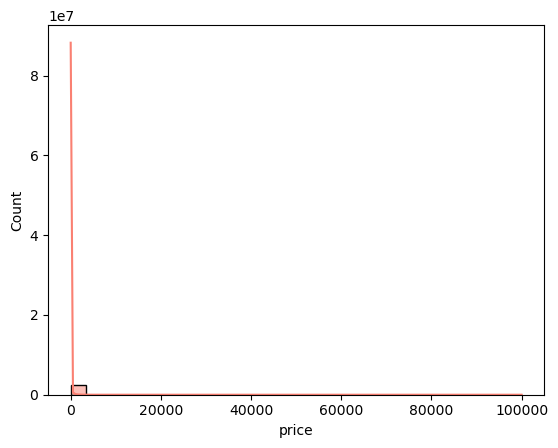

In [19]:
sns.histplot(df['price'], kde=True, bins=30, color="salmon")

In [24]:
# Filtrado de los precios que están por debajo del percentil 95.
q95 = df['price'].quantile(0.95)
df_95 = df[df['price'] <= q95]

<Axes: xlabel='price', ylabel='Count'>

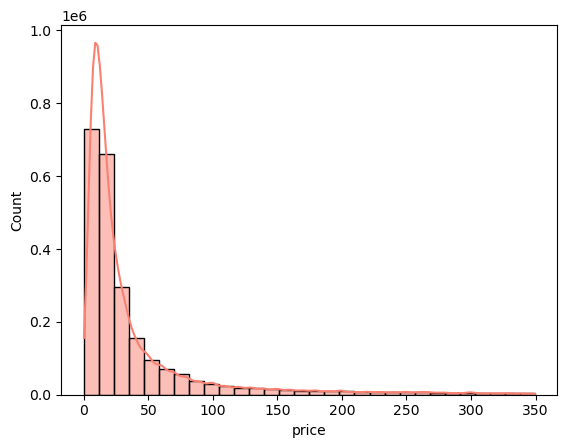

In [25]:
# Nuevo histograma sin los outliers.
sns.histplot(df_95['price'], kde=True, bins=30, color="salmon")

- Box plot para ver la distribución y outliers en los precios de los productos.

<Axes: ylabel='price'>

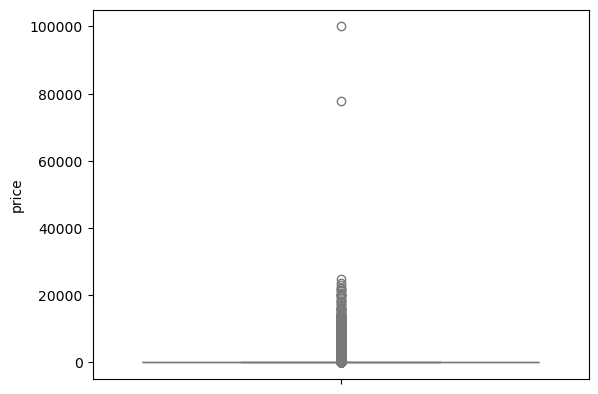

In [20]:
sns.boxplot(data = df['price'], color="lightblue")

- Con datos filtrados.

<Axes: ylabel='price'>

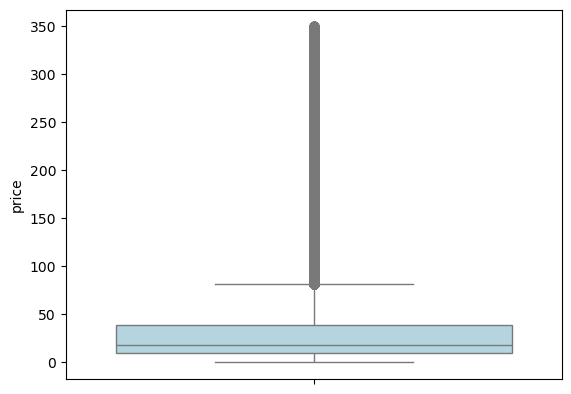

In [26]:
sns.boxplot(data=df_95['price'], color="lightblue")

- Mean, median y mode para el 'rating' de los productos.

In [28]:
mean_rating = df['stars'].mean()
median_rating = df['stars'].median()
mode_rating = df['stars'].mode()[0] # Nos devuelve una lista de 1 elemento, cojo el primero.

mean_rating, median_rating, mode_rating

(2.152836472966065, 0.0, 0.0)

 - Variance, standard deviation e interquartile range para 'rating'.

In [29]:
variance_rating = df['stars'].var()
std_dev_rating = df['stars'].std()
min_rating = df['stars'].min()
max_rating = df['stars'].max()
range_rating = max_rating - min_rating
quantiles_rating = df['stars'].quantile([0.25, 0.5, 0.75])

variance_rating, std_dev_rating, range_rating, quantiles_rating

(4.81743402976196,
 2.1948653785054697,
 5.0,
 0.25    0.0
 0.50    0.0
 0.75    4.4
 Name: stars, dtype: float64)

- Skewness y kurtosis para rating ('stars').

In [30]:
skewness_rating = df['stars'].skew()
kurtosis_rating = df['stars'].kurtosis()

In [32]:
skewness_rating, kurtosis_rating

(0.08120735761080985, -1.9260061280432985)

- Histograma de la distribución de ratings.

<Axes: xlabel='stars', ylabel='Count'>

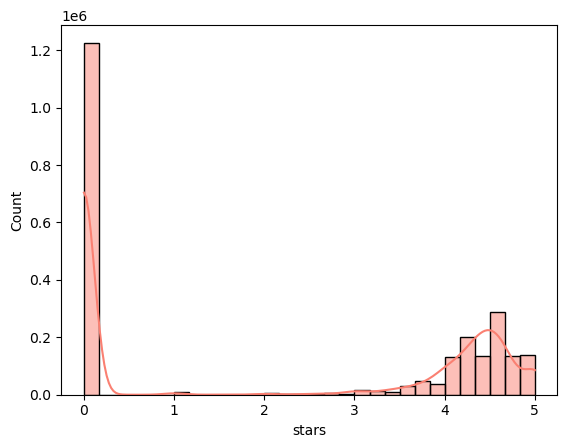

In [33]:
sns.histplot(df['stars'], kde=True, bins=30, color="salmon")